In [ ]:
#Location Based Premium Analysis
#Within each city, compare high-budget prime-location properties to similar non-prime-location properties in terms of:
#Average Carpet Area
#Amenities
#Price per square foot
#then determine whether location justifies the price premium

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn style for cleaner plots
sns.set(style='whitegrid')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/cleaned_real_estate_data.csv')

In [13]:
#define high budget listings

high_budget_df = df[df['price_lakhs'] > 50]

In [14]:
#apply carpet area range filter

high_budget_df = high_budget_df[(high_budget_df['carpet_area'] >= 300) & (high_budget_df['carpet_area'] <= 3000)]

In [15]:
#segment by prime vs non-prime location

prime_df = high_budget_df[high_budget_df['isprimelocationproperty'] == 1]
nonprime_df = high_budget_df[high_budget_df['isprimelocationproperty'] == 0]

In [16]:
#compare key metrics

carpet_comparison = {
    'Prime': round(prime_df['carpet_area'].mean(), 2),
    'Non-Prime': round(nonprime_df['carpet_area'].mean(), 2)
}

amenity_comparison = {
    'Prime': round(prime_df['amenity_count'].mean(), 2),
    'Non-Prime': round(nonprime_df['amenity_count'].mean(), 2)
}

price_sqft_comparison = {
    'Prime': round(prime_df['sqft_price'].mean(), 2),
    'Non-Prime': round(nonprime_df['sqft_price'].mean(), 2)
}

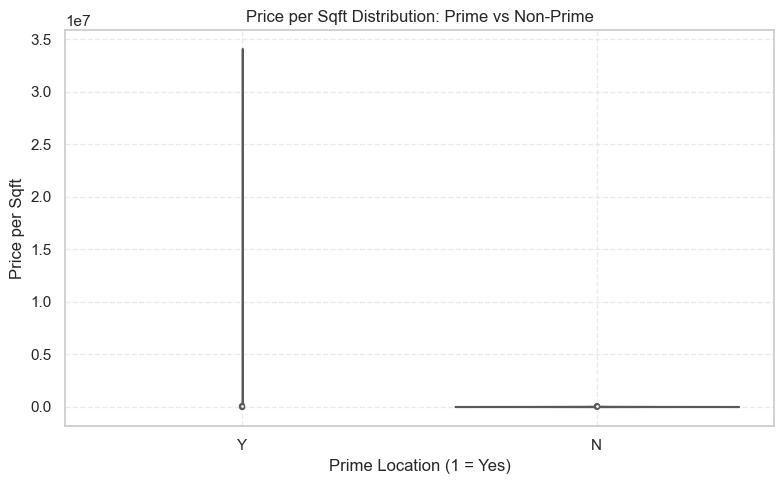

In [17]:
#visualisations

plt.figure(figsize=(8, 5))
sns.violinplot(x='isprimelocationproperty', y='sqft_price', data=high_budget_df, palette='Set2')
plt.title('Price per Sqft Distribution: Prime vs Non-Prime')
plt.xlabel('Prime Location (1 = Yes)')
plt.ylabel('Price per Sqft')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

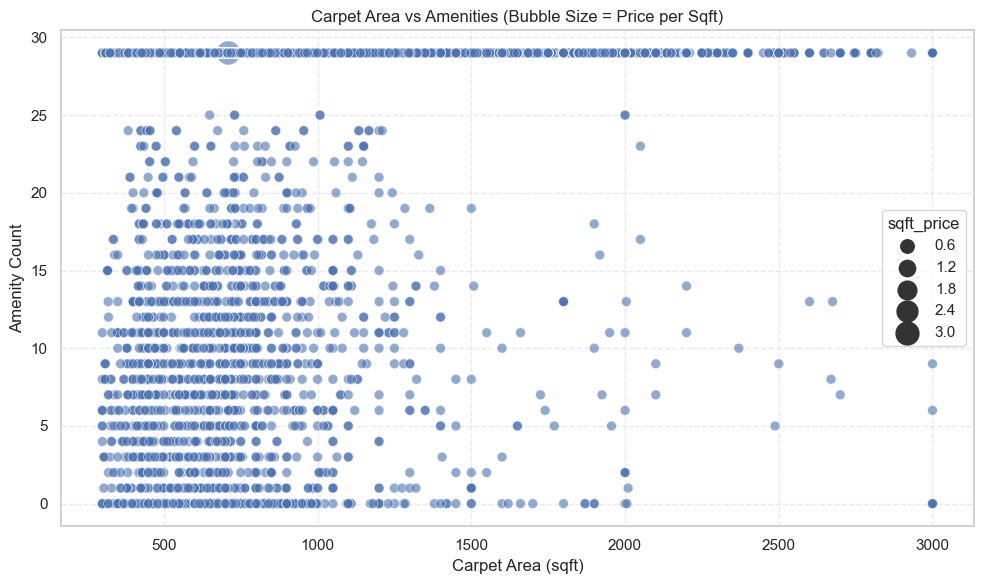

In [18]:
#carpet area vs aminities
high_budget_df['Location'] = high_budget_df['isprimelocationproperty'].map({1: 'Prime', 0: 'Non-Prime'})

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='carpet_area', y='amenity_count',
    hue='Location', size='sqft_price',
    data=high_budget_df, sizes=(50, 300), alpha=0.6, palette='coolwarm'
)
plt.title('Carpet Area vs Amenities (Bubble Size = Price per Sqft)')
plt.xlabel('Carpet Area (sqft)')
plt.ylabel('Amenity Count')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
#Conclusions:
Prime-location properties tend to have higher price per sqft and more amenities, but not always larger carpet areas.
The premium is often driven by location prestige and developer branding, rather than tangible space or features.
In cities like Mumbai, the price uplift is sharper, while in Thane, non-prime listings offer better space-to-price ratios—ideal for value-focused buyers.


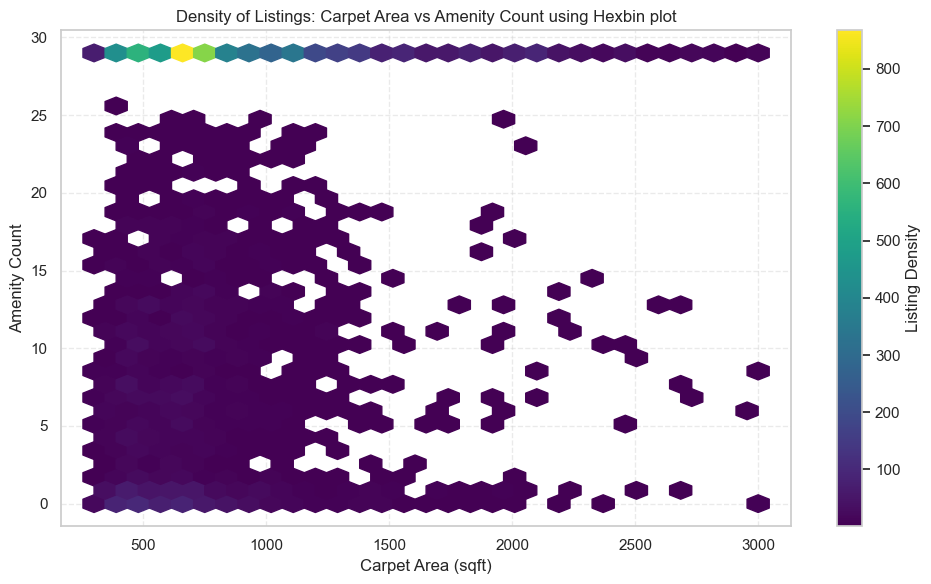

In [27]:
#CARPET AREA VS AMINITIES
plt.figure(figsize=(10, 6))
plt.hexbin(
    x=high_budget_df['carpet_area'],
    y=high_budget_df['amenity_count'],
    gridsize=30, cmap='viridis', mincnt=1
)
plt.colorbar(label='Listing Density')
plt.title('Density of Listings: Carpet Area vs Amenity Count using Hexbin plot')
plt.xlabel('Carpet Area (sqft)')
plt.ylabel('Amenity Count')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()